In [1]:
from tensorflow.keras.preprocessing.image import load_img, img_to_array, array_to_img
from tensorflow.config.experimental import list_physical_devices, set_memory_growth
from sklearn.utils import shuffle


import pandas as pd
import os 
import matplotlib.pyplot as plt
from PIL import Image
import numpy as np


In [2]:
# haetaan datasettien polut:
data_path = os.path.sep.join(['histopathologic-cancer-detection'])
train_path = os.path.sep.join(['histopathologic-cancer-detection','train'])
test_path = os.path.sep.join(['histopathologic-cancer-detection','test'])
train_labels_path = os.path.sep.join(['histopathologic-cancer-detection', 'train_labels'])
print(train_path)
print(test_path)
print(train_labels_path)


histopathologic-cancer-detection\train
histopathologic-cancer-detection\test
histopathologic-cancer-detection\train_labels


In [28]:
print(data_path)
print(os.listdir(data_path))

histopathologic-cancer-detection
['.ipynb_checkpoints', 'eval_data.csv', 'sample_submission.csv', 'test', 'testattu.csv', 'test_data.csv', 'train', 'train_data.csv', 'train_labels.csv']


In [30]:
#Tarkastetaan paljonko pohjatotuuksissa on normaali- ja syöpäsolukkoa
print('Alkuperäinen opetusdata:')
train_data = pd.read_csv(data_path+'/train_labels.csv')
print(train_data.label.value_counts())
print(train_data[:10])

# Datan jako opetus- ja evaluointidataan:
# opetusdatan käsittely ja luokkien tasaaminen:
train_data_all = train_data
train_data = train_data_all.sample(frac=0.8, random_state=42)
# Syöpäkuvia vähemmän opetusdatassa: niiden määrän mukaan tasapainoitetaan opetusdatasetti
cancer_data_size = train_data.label.value_counts()[1]
train_data_normal=train_data[train_data['label']==0].sample(cancer_data_size) 
train_data_cancer=train_data[train_data['label']==1].sample(cancer_data_size) 
train_data = shuffle(pd.concat([train_data_normal, train_data_cancer], axis=0).reset_index(drop=True))
train_data.loc[:, 'id'] +='.tif'
train_data.to_csv(data_path+'/train_data.csv', encoding='utf-8', index=False)

# evaluointidata:
eval_data_known = train_data_all.drop(train_data.index)
eval_data_known.loc[:, 'id'] +='.tif'
eval_data_known.to_csv(data_path+'/eval_data.csv', encoding='utf-8', index=False)

Alkuperäinen opetusdata:
0    130908
1     89117
Name: label, dtype: int64
                                         id  label
0  f38a6374c348f90b587e046aac6079959adf3835      0
1  c18f2d887b7ae4f6742ee445113fa1aef383ed77      1
2  755db6279dae599ebb4d39a9123cce439965282d      0
3  bc3f0c64fb968ff4a8bd33af6971ecae77c75e08      0
4  068aba587a4950175d04c680d38943fd488d6a9d      0
5  acfe80838488fae3c89bd21ade75be5c34e66be7      0
6  a24ce148f6ffa7ef8eefb4efb12ebffe8dd700da      1
7  7f6ccae485af121e0b6ee733022e226ee6b0c65f      1
8  559e55a64c9ba828f700e948f6886f4cea919261      0
9  8eaaa7a400aa79d36c2440a4aa101cc14256cda4      0


In [31]:
# Näkemättömälle testidatalle, jolla ei pohjatotuuksia, tehdään samat asiat:
test_data = pd.read_csv(data_path+'/sample_submission.csv')
test_data.loc[:, 'id'] +='.tif'
test_data.to_csv(data_path+'/test_data.csv', encoding='utf-8', index=False)

In [32]:
# Tarkastellaan opetus- ja evaluointidataa:
train_data = pd.read_csv(data_path+'/train_data.csv')
print('Opetusdata:')
print(train_data[:10])
print(train_data.label.value_counts())


eval_data_known = pd.read_csv(data_path+'/eval_data.csv') 
print('\n Evaluointidata:')
print(eval_data_known[:10])
print(eval_data_known.label.value_counts())


Opetusdata:
                                             id  label
0  ee65e8aa4caa17689870599d3495c620dc8aa0d3.tif      1
1  d9b59dcc1ad1e7b99e54e3d693cb4647e9e5c37b.tif      1
2  2e3f9ab0cce337155fc496debc0612649cc7c5c0.tif      1
3  729fb23fa02bd972b2c8996cdb75d76fbab928d1.tif      1
4  77fb3f768e9966c627e60a32013aafbcacdecd51.tif      0
5  542d2476efdd417db4ece5efc45d38511cc15234.tif      0
6  541cea38a1461b70fb5504d37a59020efa8d7bb2.tif      0
7  ae665f746b25ad23ce3aa04418ffe4164f8667ef.tif      0
8  2966d5a4c058974e646d0c2e1f8e590ab4fabf66.tif      0
9  8212ea9925ced0c22ff5bd41e92abd9718d2bc67.tif      0
1    71462
0    71462
Name: label, dtype: int64

 Evaluointidata:
                                             id  label
0  0298c59aa8dafa0470470f94dccf859c51de3ebf.tif      0
1  fbf15afc5b05fec3494abeeeeaf0aaa59ce92486.tif      1
2  cbc2368ad58f6670d641bd93fcef2fa3c9f6e0e4.tif      0
3  43115bc989be642f5eee067982ed8c0693b09359.tif      1
4  c4a1e3931f7c182984ac3bf9c33f017af4d850b

Kuvan 1 koko ja kontrasti:
96 96
255
Kuvan 2 koko ja kontrasti:
96 96
255
Kuvan 3 koko ja kontrasti:
96 96
255
Kuvan 4 koko ja kontrasti:
96 96
255
Kuvan 5 koko ja kontrasti:
96 96
255
Kuvan 6 koko ja kontrasti:
96 96
255
Kuvan 7 koko ja kontrasti:
96 96
255
Kuvan 8 koko ja kontrasti:
96 96
255
Kuvan 9 koko ja kontrasti:
96 96
255
Kuvan 10 koko ja kontrasti:
96 96
255


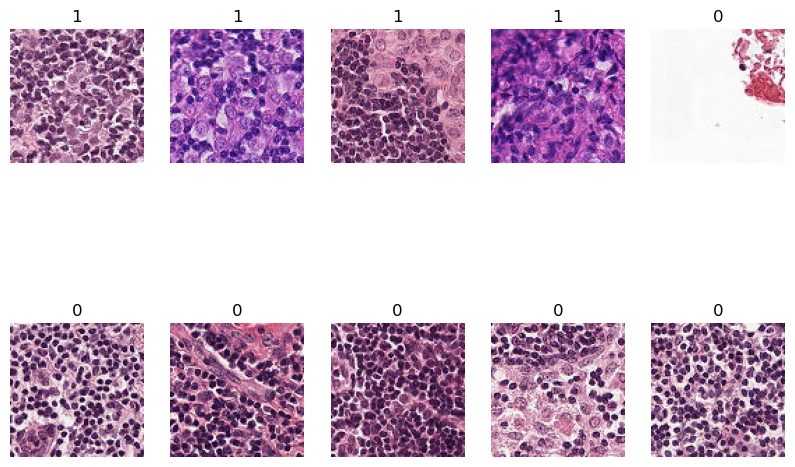

In [33]:
# Havainnollistetaan syöpä- ja normaalisolukkoa opetusdatassa:
train_data_values=train_data.values.tolist()

#Tallennetaan kuva hakemistoon:
filename='data_pics'
if not os.path.exists(filename):
        os.mkdir(filename)
    

fig = plt.figure(figsize=(10, 7)) 
rows = 2
columns = 5
index=1
for label in train_data_values[:10]:
    for pic in os.listdir(train_path):
        if label[0] == pic:
            img = np.asarray(Image.open(train_path+'/'+pic))
            fig.add_subplot(rows, columns, index) 
            plt.imshow(img, vmin=0, vmax=0)
            plt.axis('off') 
            plt.title(label[1]) 
            print(f'Kuvan {index} koko ja kontrasti:')
            print(img.shape[0], img.shape[1])
            print(np.max(img)-np.min(img))
            
            index+=1

fig.savefig(filename+'/gt_examples_traindata.png')
            

In [34]:
# Selvitetään millaisia kuvien koot ja kanavat:
def get_size_statistics(directory, ext):
    heights, widths, channels = [], [], [] 
    for file in os.listdir(directory): 
        if file.endswith(ext):
            file_path = os.path.sep.join([directory, file])
            data = img_to_array(load_img(file_path))
            heights.append(data.shape[0])
            widths.append(data.shape[1])
            if data.shape[-1] not in channels:
                channels.append(data.shape[-1])
    print(f"{len(heights)} images in total with {channels} channels.")
    print(f"Min/Max/Avg Widths: {min(widths)}/{max(widths)}/{np.mean(widths):.1f}")
    print(f"Min/Max/Avg Height: {min(heights)}/{max(heights)}/{np.mean(heights):.1f}\n")
    

In [35]:
print('Opetus- ja evaluointikuvien ominaisuudet:')
get_size_statistics(train_path, '.tif')
print('Testikuvien ominaisuudet:')
get_size_statistics(test_path, '.tif')

Opetus- ja evaluointikuvien ominaisuudet:
220025 images in total with [3] channels.
Min/Max/Avg Widths: 96/96/96.0
Min/Max/Avg Height: 96/96/96.0

Testikuvien ominaisuudet:
57458 images in total with [3] channels.
Min/Max/Avg Widths: 96/96/96.0
Min/Max/Avg Height: 96/96/96.0

